<font color='#DEB887'>

# Analysis of the world population over the past 50 years

Prepeared by comand №11:
- Anastasia Kucheruk
- Uliana Matvisiv
- Olena Mysyshyn
- Yuriy Kruglov

Recently we have heard that the world’s population have reached more than 8 billion. It was estimated in July 2022. Throughout history, each new billion people has arrived faster than the previous billion. This information was interesting, so our teams decision is to analyze the data set about population in different years in countries on every continent in the world and make the conclusions based on our research

Source of data:
https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

<font color='#FFE4C4'>

### Step 0. Connection of required libraries and definition with dataset</font>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<font color='#FFDAB9'>

### Step 1. Data import</font>

In [2]:
df = pd.read_csv('world_population.csv')

In [3]:
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


<font color='#FFE4C4'>

### Step 2. Understanding the data picture</font>

At this stage, we get general information about the DataFrame: the types of variables, their names, the number of rows and columns. After the obtained result, we will be able to understand how and with which data we should work and which data is redundant

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

<font color='#FFE4C4'>

### Step 3. Data preparation</font>

At this stage, we will deal with the data and the immediate contents of the DataFrame, namely, we will find out:

- is there any repeating data?
- is there any missing data?
- are there redundant variables?

#### Is there any repeating data?

In [5]:
df.duplicated().sum()

0

#### Is there any missing data?

In [6]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

#### Is there data we won't need to use?

For further work, we do not need certain columns, so we will delete them, and also sort the entire DataFrame by the column 'Rank', it means by the population

In [7]:
df = df.drop(['CCA3', 'Capital', 'Area (km²)', 'Density (per km²)', 'World Population Percentage'], axis=1)

In [8]:
df = df.sort_values(by = 'Rank')

In [9]:
df

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate
41,1,China,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,1.0000
92,2,India,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,1.0068
221,3,United States,North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,1.0038
93,4,Indonesia,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1.0064
156,5,Pakistan,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,1.0191
...,...,...,...,...,...,...,...,...,...,...,...,...
137,230,Montserrat,North America,4390,4500,5059,4938,5138,10805,11452,11402,0.9939
64,231,Falkland Islands,South America,3780,3747,3408,3187,3080,2332,2240,2274,1.0043
150,232,Niue,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,0.9985
209,233,Tokelau,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,1.0119


<font color='#FFE4C4'>

### Step 4. Working with data</font>

In this part, we will directly work with the data and give answers to such questions:
- how the world's population has changed over the past 50 years?
- which countries on each continent have the largest and smallest populations in 2022?
- how the population of the five countries with the largest population growth has changed over the past 50 years?

In the block below we want to work with data about world's population. Here we calculate number of population from 1970 to 2022 and show corresponding DataFrame.

In [10]:
df1 = df.loc[:,["2022 Population", "2020 Population", "2015 Population", "2010 Population", "2000 Population", "1990 Population", "1980 Population", "1970 Population"]]
lst = []
for i in df1.sum():
    lst.append(i)
lst1 = ["2022", "2020", "2015", "2010", "2000", "1990", "1980", "1970"]
df2 = pd.DataFrame()
df2["Years"] = lst1
df2["Population"] = lst
df2

,Years,Population
0,2022,7973413042
1,2020,7839250603
2,2015,7424809761
3,2010,6983784998
4,2000,6147055703
5,1990,5314191665
6,1980,4442400371
7,1970,3694136661


[Text(0.5, 1.0, 'Population of the world over 52 years')]

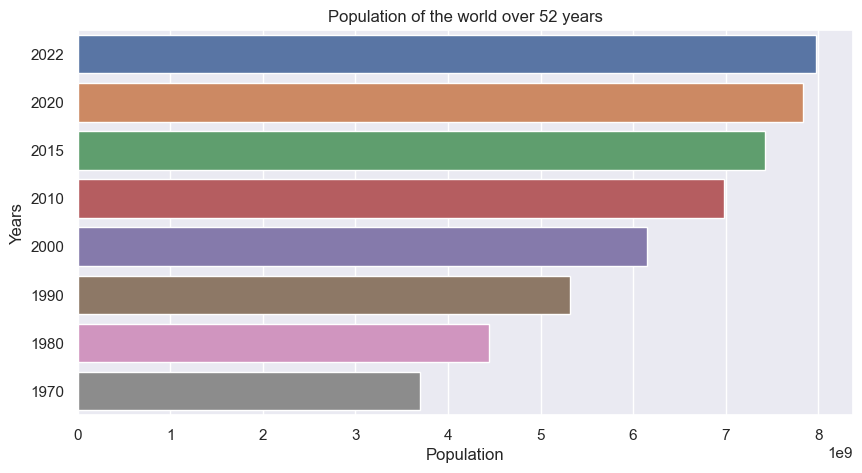

In [11]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(data=df2,x = 'Population', y = 'Years').set (title = "Population of the world over 52 years")

In this DataFrame we will work with continents, countries and population in 2022. Moreover, we will find the country with the biggest population in 2022 on the exact continent of the world.

In [12]:
continents = df.loc[:,["Country/Territory", "Continent", "2022 Population"]]
continents

,Country/Territory,Continent,2022 Population
41,China,Asia,1425887337
92,India,Asia,1417173173
221,United States,North America,338289857
93,Indonesia,Asia,275501339
156,Pakistan,Asia,235824862
...,...,...,...
137,Montserrat,North America,4390
64,Falkland Islands,South America,3780
150,Niue,Oceania,1934
209,Tokelau,Oceania,1871


The block that you can see finds the country with the biggest population in 2022 on the exact continent.

In [13]:
find_asia = continents[continents["Continent"] == "Asia"]
asia_max = find_asia['Country/Territory'].value_counts().idxmax()
asia_max

'China'

In [14]:
find_europe = continents[continents["Continent"] == "Europe"]
europe_max = find_europe['Country/Territory'].value_counts().idxmax()
europe_max

'Russia'

In [15]:
find_africa = continents[continents["Continent"] == "Africa"]
africa_max = find_africa["Country/Territory"].value_counts().idxmax()
africa_max

'Nigeria'

In [16]:
find_southamerica = continents[continents["Continent"] == "South America"]
southamerica_max = find_southamerica['Country/Territory'].value_counts().idxmax()
southamerica_max

'Brazil'

In [17]:
find_northamerica = continents[continents["Continent"] == "North America"]
northamerica_max = find_northamerica['Country/Territory'].value_counts().idxmax()
northamerica_max

'United States'

In [18]:
find_oceania = continents[continents["Continent"] == "Oceania"]
oceania_max = find_oceania["Country/Territory"].value_counts().idxmax()
oceania_max

'Australia'

The block that you can see finds the country with the smallest population in 2022 on the exact continent.

In [19]:
find_asia = continents[continents["Continent"] == "Asia"]
min_asia = find_asia.sort_values(by = ['2022 Population'], ascending = True)
min_asia = min_asia.iloc[0, min_asia.columns.get_loc('Country/Territory')]
min_asia

'Brunei'

In [20]:
find_europe = continents[continents["Continent"] == "Europe"]
min_europe = find_europe.sort_values(by = ['2022 Population'], ascending = True)
min_europe = min_europe.iloc[0, min_europe.columns.get_loc('Country/Territory')]
min_europe

'Vatican City'

In [21]:
find_africa = continents[continents['Continent'] == 'Africa']
min_africa = find_africa.sort_values(by = '2022 Population', ascending = True)
min_africa = min_africa.iloc[0, min_africa.columns.get_loc("Country/Territory")]
min_africa

'Seychelles'

In [22]:
find_southamerica = continents[continents["Continent"] == "South America"]
min_southamerica = find_southamerica.sort_values(by = '2022 Population', ascending = True)
min_southamerica = min_southamerica.iloc[0, min_southamerica.columns.get_loc('Country/Territory')]
min_southamerica

'Falkland Islands'

In [23]:
find_northamerica = continents[continents['Continent'] == 'North America']
min_northamerica = find_northamerica.sort_values(by = '2022 Population', ascending = True)
min_northamerica = min_northamerica.iloc[0, min_northamerica.columns.get_loc("Country/Territory")]
min_northamerica

'Montserrat'

In [24]:
find_oceania = continents[continents['Continent'] == 'Oceania']
min_oceania = find_oceania.sort_values(by = '2022 Population', ascending = True)
min_oceania = min_oceania.iloc[0, min_oceania.columns.get_loc("Country/Territory")]
min_oceania

'Tokelau'

In this part, we will find the countries with the highest growth rate and find out how the population of these countries changed from 1970 to 2022

In [25]:
countries=df.sort_values(by=['Growth Rate'],ascending=False).head(5)
countries

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate
133,135,Moldova,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,1.0691
164,37,Poland,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,1.0404
148,54,Niger,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1.0378
202,60,Syria,Asia,22125249,20772595,19205178,22337563,16307654,12408996,8898954,6319199,1.0376
189,116,Slovakia,Europe,5643453,5456681,5424444,5396424,5376690,5261305,4973883,4522867,1.0359


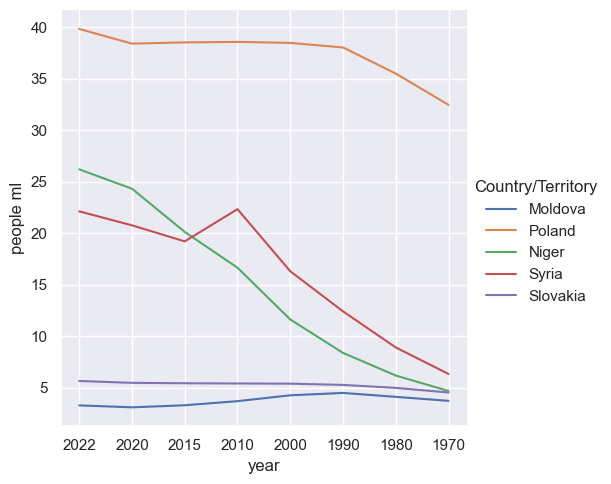

In [26]:
countries_gr=countries.drop(['Rank','Continent'],axis=1)
dict = {'2022 Population':'2022','2020 Population':'2020', '2015 Population':'2015', '2010 Population':'2010','2000 Population':'2000', '1990 Population':'1990', '1980 Population':'1980','1970 Population':'1970'}
countries_gr.rename(columns=dict,inplace=True)
countries_gr = countries_gr.drop(['Growth Rate'],axis=1).melt('Country/Territory', var_name='year', value_name='people ml')
countries_gr['people ml'] = (countries_gr['people ml']/1000000).round(decimals=2)
sns.relplot(data=countries_gr, x='year', y='people ml', hue='Country/Territory', kind="line")

<font color='#FFE4C4'>

## Conclusion

In conclusion, we have analyzed this data set in details and now everyone can see how the population has generally changed over the years. Moreover, we found the country on the exact continent with the smallest and the biggest population now, in 2022. In addition, we can see five countries with the highest rate of growth. In general, we discovered how the population and in what way it has changed over the years in the world.